# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [163]:
import pandas as pd

## imports for Python, Pandas

In [164]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [165]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [166]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [167]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [168]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [169]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,docty,envassesmentcategorycode,grantamt,ibrdcommamt,id,idacommamt,impagency,lendinginstr,lendinginstrtype,lendprojectcost,majorsector_percent,mjsector_namecode,mjtheme,mjtheme_namecode,mjthemecode,prodline,prodlinetext,productlinetype,project_abstract,project_name,projectdocs,projectfinancialtype,projectstatusdisplay,regionname,sector,sector1,sector2,sector3,sector4,sector_namecode,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,"Project Information Document,Indigenous Peoples Plan,Project Information Document",C,0,0,P129828,130000000,MINISTRY OF EDUCATION,Investment Project Financing,IN,550000000,"[{'Name': 'Education', 'Percent': 46}, {'Name': 'Education', 'Percent': 26}, {'Name': 'Public Administration, Law, and Justice', 'Percent': 16}, {'Name': 'Education', 'Percent': 12}]","[{'name': 'Education', 'code': 'EX'}, {'name': 'Education', 'code': 'EX'}, {'name': 'Public Administration, Law, and Justice', 'code': 'BX'}, {'name': 'Education', 'code': 'EX'}]",[Human development],"[{'name': 'Human development', 'code': '8'}, {'name': '', 'code': '11'}]","8,11",PE,IBRD/IDA,L,{'cdata': 'The development objective of the Second Phase of General Education Quality Improvement Project for Ethiopia is to improve learning conditions in primary and secondary schools and streng...,Ethiopia General Education Quality Improvement Project II,"[{'DocTypeDesc': 'Project Information Document (PID), Vol.', 'DocType': 'PID', 'EntityID': '090224b081e545fb_1_0', 'DocURL': 'http://www-wds.worldbank.org/servlet/WDSServlet?pcont=details&eid=090...",IDA,Active,Africa,"[{'Name': 'Primary education'}, {'Name': 'Secondary education'}, {'Name': 'Public administration- Other social services'}, {'Name': 'Tertiary education'}]","{'Name': 'Primary education', 'Percent': 46}","{'Name': 'Secondary education', 'Percent': 26}","{'Name': 'Public administration- Other social services', 'Percent': 16}","{'Name': 'Tertiary education', 'Percent': 12}","[{'name': 'Primary education', 'code': 'EP'}, {'name': 'Secondary education', 'code': 'ES'}, {'name': 'Public administration- Other social services', 'code': 'BS'}, {'name': 'Tertiary education', ...","ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethiopia-general-education-quality-improvement-project-ii?lang=en
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,"Project Information Document,Integrated Safeguards Data Sheet,Integrated Safeguards Data Sheet,Project Information Document,Integrated Safeguards Data Sheet,Project Information Document",C,4700000,0,P144674,0,MINISTRY OF FINANCE,Specific Investment Loan,IN,5700000,"[{'Name': 'Public Administration, Law, and Justice', 'Percent': 70}, {'Name': 'Public Administration, Law, and Justice', 'Percent': 30}]","[{'name': 'Public Administration, Law, and Justice', 'code': 'BX'}, {'name': 'Public Administration, Law, and Justice', 'code': 'BX'}]","[Economic management, Social protection and risk management]","[{'name': 'Economic management', 'code': '1'}, {'name': 'Social protection and risk management', 'code': '6'}]","1,6",RE,Recipient Executed Activities,L,NaN,TN: DTF Social Protection Reforms Support,"[{'DocTypeDesc': 'Project Information Document (PID), Vol.1 of 1', 'DocType': 'PID', 'EntityID': '000333037_20131024115616', 'DocURL': 'http://www-wds.worldbank.org/servlet/WDSServlet?pcont=detai...",OTHER,Active,Middle 

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [170]:
# Import required packages and adjust display settings to see more of dataframe.

import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt

display(HTML("<style>.container { width:90% !important; }</style>"))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 200)

In [171]:
# Read data into dataframe and explore.

json_df = pd.read_json('data/world_bank_projects.json')

In [172]:
json_df.head(10)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,docty,envassesmentcategorycode,grantamt,ibrdcommamt,id,idacommamt,impagency,lendinginstr,lendinginstrtype,lendprojectcost,majorsector_percent,mjsector_namecode,mjtheme,mjtheme_namecode,mjthemecode,prodline,prodlinetext,productlinetype,project_abstract,project_name,projectdocs,projectfinancialtype,projectstatusdisplay,regionname,sector,sector1,sector2,sector3,sector4,sector_namecode,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,"Project Information Document,Indigenous Peoples Plan,Project Information Document",C,0,0,P129828,130000000,MINISTRY OF EDUCATION,Investment Project Financing,IN,550000000,"[{'Percent': 46, 'Name': 'Education'}, {'Percent': 26, 'Name': 'Education'}, {'Percent': 16, 'Name': 'Public Administration, Law, and Justice'}, {'Percent': 12, 'Name': 'Education'}]","[{'code': 'EX', 'name': 'Education'}, {'code': 'EX', 'name': 'Education'}, {'code': 'BX', 'name': 'Public Administration, Law, and Justice'}, {'code': 'EX', 'name': 'Education'}]",[Human development],"[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]","8,11",PE,IBRD/IDA,L,{'cdata': 'The development objective of the Second Phase of General Education Quality Improvement Project for Ethiopia is to improve learning conditions in primary and secondary schools and streng...,Ethiopia General Education Quality Improvement Project II,"[{'DocDate': '28-AUG-2013', 'EntityID': '090224b081e545fb_1_0', 'DocURL': 'http://www-wds.worldbank.org/servlet/WDSServlet?pcont=details&eid=090224b081e545fb_1_0', 'DocType': 'PID', 'DocTypeDesc':...",IDA,Active,Africa,"[{'Name': 'Primary education'}, {'Name': 'Secondary education'}, {'Name': 'Public administration- Other social services'}, {'Name': 'Tertiary education'}]","{'Percent': 46, 'Name': 'Primary education'}","{'Percent': 26, 'Name': 'Secondary education'}","{'Percent': 16, 'Name': 'Public administration- Other social services'}","{'Percent': 12, 'Name': 'Tertiary education'}","[{'code': 'EP', 'name': 'Primary education'}, {'code': 'ES', 'name': 'Secondary education'}, {'code': 'BS', 'name': 'Public administration- Other social services'}, {'code': 'ET', 'name': 'Tertiar...","ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethiopia-general-education-quality-improvement-project-ii?lang=en
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,"Project Information Document,Integrated Safeguards Data Sheet,Integrated Safeguards Data Sheet,Project Information Document,Integrated Safeguards Data Sheet,Project Information Document",C,4700000,0,P144674,0,MINISTRY OF FINANCE,Specific Investment Loan,IN,5700000,"[{'Percent': 70, 'Name': 'Public Administration, Law, and Justice'}, {'Percent': 30, 'Name': 'Public Administration, Law, and Justice'}]","[{'code': 'BX', 'name': 'Public Administration, Law, and Justice'}, {'code': 'BX', 'name': 'Public Administration, Law, and Justice'}]","[Economic management, Social protection and risk management]","[{'code': '1', 'name': 'Economic management'}, {'code': '6', 'name': 'Social protection and risk management'}]","1,6",RE,Recipient Executed Activities,L,NaN,TN: DTF Social Protection Reforms Support,"[{'DocDate': '29-MAR-2013', 'EntityID': '000333037_20131024115616', 'DocURL': 'http://www-wds.worldbank.org/servlet/WDSServlet?pcont=details&eid=000333037_20131024115616', 'DocType': 'PID', 'DocTy...",OTHER,Active,Middl

In [173]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

# 1. Find the 10 countries with most projects

In [174]:
# Check dataframe to make sure each project has only one row. 

json_df.project_name.value_counts().head(10)

Cash Transfer Program for Vulnerable Children in Northern Togo                   1
Kenya Water Security and Climate Resilience Project                              1
Output-Based Aid for Municipal Solid Waste Management                            1
Productive and Sustainable Cities Development Policy Loan                        1
Guinea - MSME Development Project                                                1
Revision and Alignment of NAP with UNCCD 10-year Strategic Plan and Framework    1
Additional Financing Health Sector Development Support Project                   1
Congo Skills Development for Employability Project                               1
Capturing Coral Reef Ecosystem Services (CCRES)                                  1
Revenue Administration Modernization Project                                     1
Name: project_name, dtype: int64

# Solution to #1, Find the 10 countries with most projects

In [175]:
json_df.countryname.value_counts().head(10)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Nepal                              12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

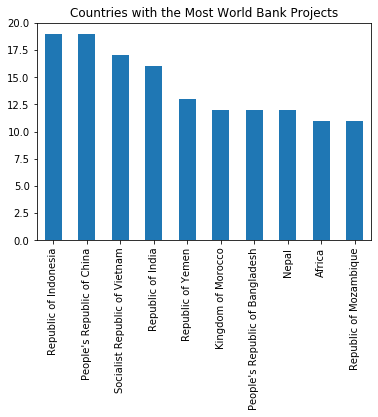

In [176]:
json_df.countryname.value_counts().head(10).plot.bar(x='Country', y='Project Count')
plt.ylim([0,20])
plt.title('Countries with the Most World Bank Projects')
plt.show()

# 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [177]:
flat_themes = pd.DataFrame()

# Get mjtheme_namecode column into a list so we can normalze it. 
themes = json_df.mjtheme_namecode.values.tolist()

# Normalize the list of dictionaries in 'mjtheme_namecode', append into a DataFrame for analysis. 
for theme in themes:
    flat_theme = json_normalize(theme)
    flat_themes = flat_themes.append(flat_theme)
    
# Find top 10 major project themes
flat_themes.name.value_counts().head(10)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

In [178]:
# This is not the correct answer due to the blank theme names. To get correct answer we must find and fix blank theme names. 

In [179]:
# Find blank theme names.
code_name_groups = flat_themes.groupby(['code', 'name'])['name'].size()
code_name_groups

code  name                                        
1                                                       5
      Economic management                              33
10                                                     14
      Rural development                               202
11                                                     27
      Environment and natural resources management    223
2                                                      15
      Public sector governance                        184
3                                                       3
      Rule of law                                      12
4                                                      16
      Financial and private sector development        130
5                                                       5
      Trade and integration                            72
6                                                      10
      Social protection and risk management           158
7                    

In [180]:
# Looks like blank theme names are a simple mistake - all non-blank theme names match for same code, so fill in blanks with name that corresponds to code number. 

In [181]:
# Save groupby results in a dataframe.
mjtheme_code_names = pd.DataFrame(code_name_groups)

# Drop rows in dataframe with blank names to get list of correct names for each major theme code.
mjtheme_code_names = mjtheme_code_names.loc[mjtheme_code_names.index.get_level_values('name') != ""]
mjtheme_code_names

,,name
code,name,
1,Economic management,33
10,Rural development,202
11,Environment and natural resources management,223
2,Public sector governance,184
3,Rule of law,12
4,Financial and private sector development,130
5,Trade and integration,72
6,Social protection and risk management,158
7,Social dev/gender/inclusion,119


In [182]:
# Rename the column created by the .size() aggregation so we don't get an error on the reset_index() for trying to make two columns with the same name. 
mjtheme_code_names.columns = ['name_count']

# Reset the index to a RangeIndex so code is a column, which we need for the merge. 
mjtheme_code_names = mjtheme_code_names.reset_index()

# Merge the flat_themes dataframe with the mjtheme_code_names reference dataframe
merged_flat_themes = pd.merge(flat_themes, mjtheme_code_names, on='code', suffixes=('_orig', '_ref'))

# Solution to #2, Find the top 10 major project themes (using column 'mjtheme_namecode')

In [183]:
merged_flat_themes.name_ref.value_counts().head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name_ref, dtype: int64

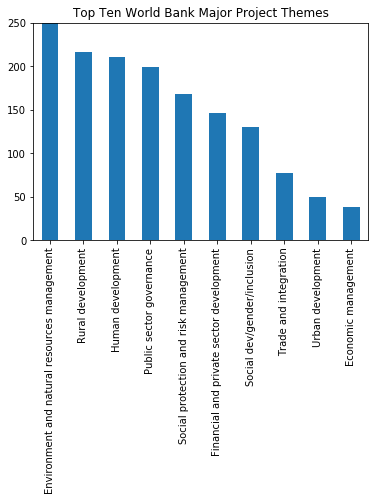

In [184]:
merged_flat_themes.name_ref.value_counts().head(10).plot.bar(x='Major Project Theme', y='Project Count')
plt.ylim([0,250])
plt.title('Top Ten World Bank Major Project Themes')
plt.show()

# 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [185]:
# Find rows with no major project theme names.

json_df[json_df.mjtheme.isnull()][['mjtheme', 'mjtheme_namecode', 'mjthemecode']]

,mjtheme,mjtheme_namecode,mjthemecode
12,NaN,"[{'code': '4', 'name': ''}]",4
67,NaN,"[{'code': '7', 'name': ''}]",7
87,NaN,"[{'code': '11', 'name': ''}]",11
102,NaN,"[{'code': '2', 'name': ''}]",2
103,NaN,"[{'code': '11', 'name': ''}]",11
121,NaN,"[{'code': '9', 'name': ''}]",9
169,NaN,"[{'code': '2', 'name': ''}]",2
276,NaN,"[{'code': '10', 'name': ''}]",10
469,NaN,"[{'code': '11', 'name': ''}]",11


In [186]:
# Save indices of these rows for testing after the fix. 

idx_list_1 = json_df[json_df.mjtheme.isnull()].index.tolist()
idx_list_1

[12, 67, 87, 102, 103, 121, 169, 276, 469]

In [187]:
# Find rows with no major theme codes. 

json_df[json_df.mjthemecode.isnull()][['mjtheme', 'mjtheme_namecode', 'mjthemecode']]

,mjtheme,mjtheme_namecode,mjthemecode


In [188]:
# Find rows with some, but not enough major project theme names. First get rid of rows with NaN mjtheme values so .apply(len) will work. We already saw rows with NaN mjthemes above. 

not_nulls = json_df[json_df.mjtheme.notnull()]
not_nulls[not_nulls.mjthemecode.str.split(",").apply(len) != not_nulls.mjtheme.apply(len)][['mjtheme', 'mjtheme_namecode', 'mjthemecode']]

,mjtheme,mjtheme_namecode,mjthemecode
0,[Human development],"[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]","8,11"
5,[Social protection and risk management],"[{'code': '6', 'name': 'Social protection and risk management'}, {'code': '6', 'name': ''}]","6,6"
7,[Environment and natural resources management],"[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '8', 'name': ''}]","11,8"
8,[Rural development],"[{'code': '10', 'name': 'Rural development'}, {'code': '7', 'name': ''}]","10,7"
10,[Rural development],"[{'code': '10', 'name': 'Rural development'}, {'code': '2', 'name': ''}]","10,2"
16,[Rural development],"[{'code': '10', 'name': 'Rural development'}, {'code': '2', 'name': ''}]","10,2"
17,[Human development],"[{'code': '8', 'name': 'Human development'}, {'code': '7', 'name': ''}]","8,7"
30,[Human development],"[{'code': '8', 'name': 'Human development'}, {'code': '4', 'name': ''}]","8,4"
36,[Rural development],"[{'code': '10', 'name': 'Rural development'}, {'code': '11', 'name': ''}]","10,11"
37,[Social protection and risk management],"[{'code': '6', 'name': 'Social protection and risk management'}, {'code': '7', 'name': ''}]","6,7"


In [189]:
# Save indices of these rows for testing after the fix. 

idx_list_2 = not_nulls[not_nulls.mjthemecode.str.split(",").apply(len) != not_nulls.mjtheme.apply(len)].index.tolist()
idx_list_2

[0,
 5,
 7,
 8,
 10,
 16,
 17,
 30,
 36,
 37,
 39,
 43,
 44,
 45,
 47,
 50,
 60,
 62,
 63,
 68,
 72,
 74,
 77,
 78,
 80,
 85,
 86,
 88,
 90,
 91,
 101,
 109,
 120,
 130,
 131,
 138,
 139,
 143,
 144,
 149,
 152,
 153,
 156,
 160,
 161,
 164,
 172,
 183,
 192,
 202,
 209,
 226,
 231,
 232,
 233,
 234,
 235,
 237,
 239,
 241,
 278,
 281,
 296,
 303,
 304,
 308,
 309,
 323,
 325,
 326,
 327,
 329,
 331,
 336,
 338,
 341,
 342,
 345,
 346,
 348,
 350,
 355,
 363,
 365,
 366,
 375,
 378,
 392,
 400,
 407,
 411,
 412,
 413,
 414,
 419,
 423,
 426,
 440,
 445,
 446,
 451,
 453,
 454,
 472,
 473,
 476,
 479,
 480,
 485,
 491,
 493,
 494,
 497]

In [190]:
#Use mjtheme_code_names from problem 2 as reference to fill in missing major project theme names from code values. 

mjtheme_code_names

,code,name,name_count
0,1,Economic management,33
1,10,Rural development,202
2,11,Environment and natural resources management,223
3,2,Public sector governance,184
4,3,Rule of law,12
5,4,Financial and private sector development,130
6,5,Trade and integration,72
7,6,Social protection and risk management,158
8,7,Social dev/gender/inclusion,119
9,8,Human development,197


# Solution to # 3, Create a dataframe with the missing names filled in.

In [191]:
def fix_mjtheme(row):
    """Create list of major project theme names for one row, using mjtheme_code_names reference dataframe to map codes to names."""

    name_list = []
    code_list = []

    # Build mjtheme list from mjthemecode, which we assume is correct as it has the most information of the major project theme columns. 
    # We already know from exploring the dataframe that there are no NaN values for mjthemecode. 
    code_list = row['mjthemecode'].split(",")
    
    for mjcode in code_list:
        # Get index value for the theme name in the reference dataframe that matches mjcode to use in the .at lookup because we can't do boolean filtering with .at.
        mjname_index = mjtheme_code_names.loc[mjtheme_code_names.code == mjcode]['name'].index[0]
        # Get the name object that matches mjcode.
        mjname = mjtheme_code_names.at[mjname_index, 'name']
        # Build the list of major project theme names. 
        name_list.append(mjname)

    return name_list    


def fix_mjtheme_namecode(row):
    """Create list of dictionaries for one row, with {'code':mjthemecode, 'name':mjtheme} for each mjthemecode in a project."""

    # Set code_list from mjthemecode, which we are assuming is correct as it has the most information of the three columns. 
    # Set name_list from mjtheme, which has just been corrected with values in mjthemecode. 
    dict_list = []
    code_list = row['mjthemecode'].split(",")
    name_list = row['mjtheme']

    # Only proceed if lists are same length, otherwise, return empty list.
    if len(code_list) != len(name_list):
        return dict_list

    for i in range(len(code_list)):
        dict_code = {'code': code_list[i], 'name': name_list[i]}
        dict_list.append(dict_code)
    
    return dict_list        

# Copy dataframe, then correct columns in dataframe copy.
copy_df = json_df.copy()
copy_df['mjtheme'] = copy_df.apply(fix_mjtheme, axis=1)
copy_df['mjtheme_namecode'] = copy_df.apply(fix_mjtheme_namecode, axis=1)


# Check results

In [192]:
# Find rows with no major project theme names.

copy_df[copy_df.mjtheme.isnull()][['mjtheme', 'mjtheme_namecode', 'mjthemecode']]

,mjtheme,mjtheme_namecode,mjthemecode


In [193]:
# Find rows with some, but not enough major project theme names. First get rid of rows with NaN mjtheme values so .apply(len) will work. We already saw rows with NaN mjthemes above. 

not_nulls = copy_df[copy_df.mjtheme.notnull()]
not_nulls[not_nulls.mjthemecode.str.split(",").apply(len) != not_nulls.mjtheme.apply(len)][['mjtheme', 'mjtheme_namecode', 'mjthemecode']]

,mjtheme,mjtheme_namecode,mjthemecode


In [194]:
# Check rows from list idx_list_1

copy_df.iloc[idx_list_1][['mjtheme', 'mjtheme_namecode', 'mjthemecode']]

,mjtheme,mjtheme_namecode,mjthemecode
12,[Financial and private sector development],"[{'code': '4', 'name': 'Financial and private sector development'}]",4
67,[Social dev/gender/inclusion],"[{'code': '7', 'name': 'Social dev/gender/inclusion'}]",7
87,[Environment and natural resources management],"[{'code': '11', 'name': 'Environment and natural resources management'}]",11
102,[Public sector governance],"[{'code': '2', 'name': 'Public sector governance'}]",2
103,[Environment and natural resources management],"[{'code': '11', 'name': 'Environment and natural resources management'}]",11
121,[Urban development],"[{'code': '9', 'name': 'Urban development'}]",9
169,[Public sector governance],"[{'code': '2', 'name': 'Public sector governance'}]",2
276,[Rural development],"[{'code': '10', 'name': 'Rural development'}]",10
469,[Environment and natural resources management],"[{'code': '11', 'name': 'Environment and natural resources management'}]",11


In [195]:
# Check rows from list idx_list_2

copy_df.iloc[idx_list_2][['mjtheme', 'mjtheme_namecode', 'mjthemecode']]

,mjtheme,mjtheme_namecode,mjthemecode
0,"[Human development, Environment and natural resources management]","[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': 'Environment and natural resources management'}]","8,11"
5,"[Social protection and risk management, Social protection and risk management]","[{'code': '6', 'name': 'Social protection and risk management'}, {'code': '6', 'name': 'Social protection and risk management'}]","6,6"
7,"[Environment and natural resources management, Human development]","[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '8', 'name': 'Human development'}]","11,8"
8,"[Rural development, Social dev/gender/inclusion]","[{'code': '10', 'name': 'Rural development'}, {'code': '7', 'name': 'Social dev/gender/inclusion'}]","10,7"
10,"[Rural development, Public sector governance]","[{'code': '10', 'name': 'Rural development'}, {'code': '2', 'name': 'Public sector governance'}]","10,2"
16,"[Rural development, Public sector governance]","[{'code': '10', 'name': 'Rural development'}, {'code': '2', 'name': 'Public sector governance'}]","10,2"
17,"[Human development, Social dev/gender/inclusion]","[{'code': '8', 'name': 'Human development'}, {'code': '7', 'name': 'Social dev/gender/inclusion'}]","8,7"
30,"[Human development, Financial and private sector development]","[{'code': '8', 'name': 'Human development'}, {'code': '4', 'name': 'Financial and private sector development'}]","8,4"
36,"[Rural development, Environment and natural resources management]","[{'code': '10', 'name': 'Rural development'}, {'code': '11', 'name': 'Environment and natural resources management'}]","10,11"
37,"[Social protection and risk management, Social dev/gender/inclusion]","[{'code': '6', 'name': 'Social protection and risk management'}, {'code': '7', 'name': 'Social dev/gender/inclusion'}]","6,7"
